# Week 3 Paractical

In [1]:
import networkx as nx

# Initialize an empty graph
G = nx.Graph()

# Read the edge list from the file
with open("data/com-amazon.ungraph.txt", "r") as f:
    for line in f:
        # Skip comment lines
        if line.startswith("#"):
            continue
        # Read the edge and add it to the graph
        from_node, to_node = map(int, line.split())
        G.add_edge(from_node, to_node)

In [2]:
# Print the graph
print(G)

Graph with 334863 nodes and 925872 edges


Recall that a power law distribution is a probability distribution in which the frequency of an event is inversely proportional to its rank.
$$
P_k = C \cdot K^{-\alpha}
$$
This is the usual case $\alpha > 1$, usually between 2 to 3.   
Some times it can be: 
$$
P_k = C \cdot K^{-\alpha^{-1}}
$$  
This case is the more rare case.  $\alpha > 0$. 
where 
 is the probability that a node has degree 
, and 
 is the power law exponent.

Let’s see what a power law distribution actually looks like.

In [3]:
import numpy as np

# Random seed
np.random.seed(42)

# Generate samples from a power law distribution
alpha = 1.5  # Power law exponent
num_samples = 20  # Number of samples to generate

# Generate samples using the power law distribution formula
samples = np.random.pareto(alpha - 1, num_samples)

formatted_samples = [f"{sample:.1f}" for sample in samples]
print(", ".join(formatted_samples))

1.6, 410.7, 12.9, 5.2, 0.4, 0.4, 0.1, 54.8, 5.3, 10.7, 0.0, 1103.5, 34.6, 0.6, 0.5, 0.5, 1.1, 3.4, 2.1, 1.0


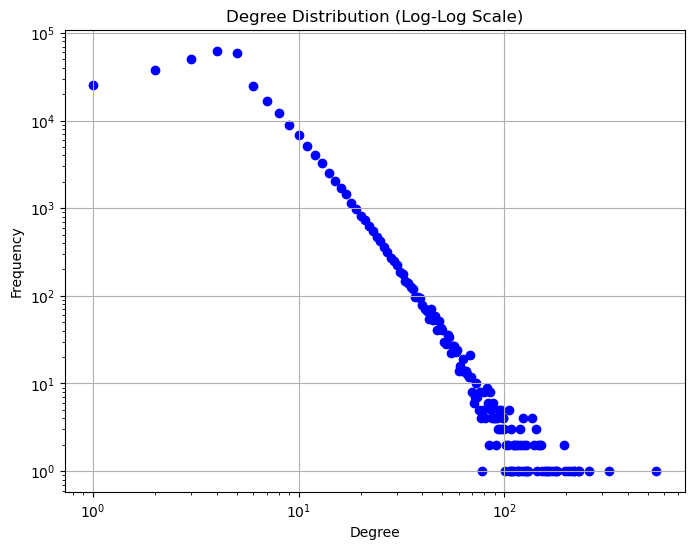

In [4]:
import matplotlib.pyplot as plt
# Calculate the degree histogram
degree_hist = nx.degree_histogram(G)

# Generate x (degree) and y (frequency) values
degrees = np.arange(len(degree_hist))
frequencies = np.array(degree_hist)

# Filter out zero frequencies for log-log plotting
non_zero_indices = frequencies > 0
degrees = degrees[non_zero_indices]
frequencies = frequencies[non_zero_indices]

# Plot the degree distribution on a log-log scale
plt.figure(figsize=(8, 6))
plt.scatter(degrees, frequencies, marker='o', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution (Log-Log Scale)')
plt.grid(True)
plt.show()


zero degree +ve count will result in error.  
below is the count of vertices with the number of degrees that is euqal to the ith position.  
i.e 0 vertices at 0 degree.  

In [5]:
print(degree_hist)

[0, 25709, 37326, 51042, 62072, 59781, 24523, 16799, 12131, 8801, 6863, 5155, 4067, 3262, 2544, 2029, 1693, 1468, 1152, 969, 810, 727, 622, 548, 474, 419, 362, 316, 267, 250, 224, 186, 176, 147, 142, 125, 120, 97, 98, 95, 79, 71, 68, 55, 71, 53, 59, 41, 51, 43, 41, 30, 28, 36, 34, 22, 27, 27, 23, 24, 14, 16, 14, 19, 14, 14, 13, 12, 21, 12, 8, 6, 7, 10, 7, 5, 8, 4, 1, 5, 8, 4, 9, 6, 2, 8, 5, 4, 6, 4, 4, 2, 4, 3, 5, 3, 5, 3, 4, 4, 3, 1, 2, 0, 2, 5, 1, 1, 3, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 3, 2, 0, 1, 4, 2, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 3, 0, 1, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [6]:
len(degree_hist)

550

In [7]:
from sklearn.linear_model import LinearRegression

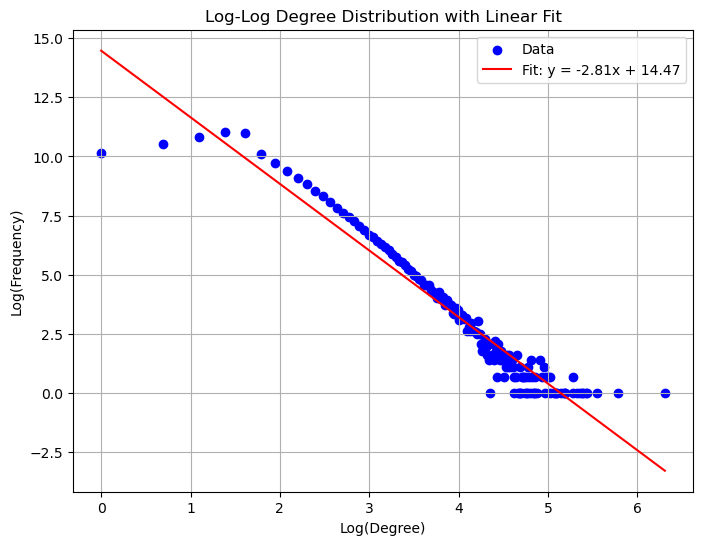

Estimated power law exponent: 2.81


In [8]:
# Log-transform the data
log_degrees = np.log(degrees).reshape(-1, 1)  # Reshape for sklearn
log_frequencies = np.log(frequencies)

# Perform linear regression using sklearn
model = LinearRegression()
model.fit(log_degrees, log_frequencies)

# Get the slope (coefficient) and intercept from the model
slope = model.coef_[0]
intercept = model.intercept_

# Estimate the power law exponent (slope is the negative of the exponent)
estimated_exponent = -slope

# Plot the degree distribution and the fitted line
plt.figure(figsize=(8, 6))
plt.scatter(log_degrees, log_frequencies, marker='o', color='blue', label='Data')
plt.plot(log_degrees, model.predict(log_degrees), color='red', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('Log(Degree)')
plt.ylabel('Log(Frequency)')
plt.title('Log-Log Degree Distribution with Linear Fit')
plt.legend()
plt.grid(True)
plt.show()

print(f"Estimated power law exponent: {estimated_exponent:.2f}")

# Section 2: Small world effect  
This code demostrates the small world effect.  

In [9]:
import random
# Set the random seed for reproducibility
random.seed(42)

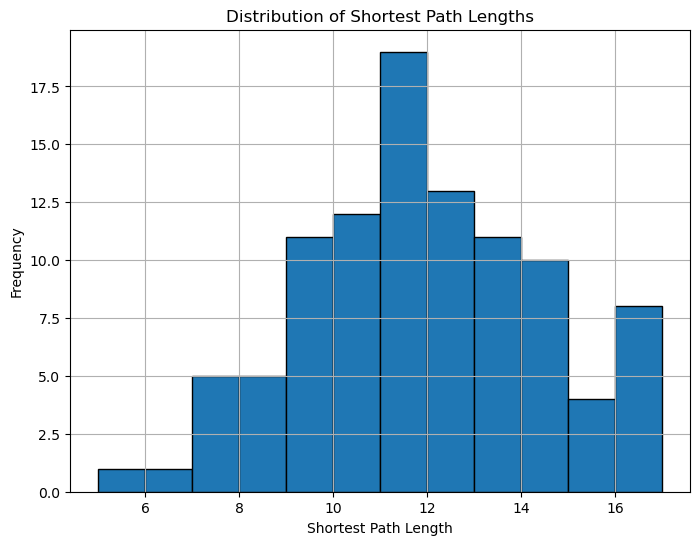

Average shortest path length: 11.44


In [10]:
# List to store shortest path lengths
shortest_path_lengths = []

# Convert G.nodes to a list
nodes_list = list(G.nodes)

# Perform the task 100 times
for _ in range(100):
    # Randomly pick two different nodes
    node1, node2 = random.sample(nodes_list, 2)
    
    # Calculate the shortest path length between them
    try:
        path_length = nx.shortest_path_length(G, source=node1, target=node2)
        shortest_path_lengths.append(path_length)
    except nx.NetworkXNoPath:
        # If there's no path, ignore this pair
        continue

# Calculate the average of the shortest path lengths
average_shortest_path_length = np.mean(shortest_path_lengths)

# Plot a bar plot of the distribution of shortest path lengths
plt.figure(figsize=(8, 6))
plt.hist(shortest_path_lengths, bins=np.arange(min(shortest_path_lengths), max(shortest_path_lengths) + 1), edgecolor='black')
plt.xlabel('Shortest Path Length')
plt.ylabel('Frequency')
plt.title('Distribution of Shortest Path Lengths')
plt.grid(True)
plt.show()

# Print the average shortest path length
print(f"Average shortest path length: {average_shortest_path_length:.2f}")


This graph has 330,000 nodes and “only” 925,000 edges, but the average shortest path length is only about 12. This is larger than for a social network, but still surprisingly small.

What is the property of these networks that caused this?    
The power law?    
Becasue the node (vertices) have high number of degrees/ connections? 

## Robutsness of the graph   
Robustness refers to the ability of a network to maintain its general structural and functional integrity when faced with failures or attacks. In the context of scale-free networks, robustness is particularly interesting because of the heterogeneous distribution of connections.   

High Robustness Against Random Failures. Due to the presence of many low-degree nodes, randomly removing nodes or edges from a scale-free network usually does not significantly affect the network’s overall connectivity or functionality. The network can maintain its large connected component, as the removal of low-degree nodes has minimal impact.   

Low Robustness Against Targeted Attacks. If the high-degree nodes (hubs) are targeted and removed, the network’s robustness decreases significantly. Since these hubs are crucial for maintaining the network’s structure, their removal can lead to fragmentation and a significant loss of network efficiency and connectivity.   


Quantifying the robustness of scale-free networks involves several metrics and methodologies:

Giant Component Size. The size of the largest connected subgraph in the network. A robust network maintains a large giant component even after node removals.   
##### Minimum spanning tree?  subgraph?

Critical Threshold. The fraction of nodes that need to be removed for the network to fragment significantly. In scale-free networks, this threshold is higher for random failures and lower for targeted attacks.

Network Efficiency. This metric evaluates the efficiency of information transfer within the network. It is calculated as the inverse of the average shortest path length between all pairs of nodes. A robust network maintains high efficiency even when some nodes are removed.

$$ E(G) = \frac{1}{N(N-1)} \sum_{i \neq j \in V} \frac{1}{d_{ij}} $$


In [11]:
# Assuming G is your graph, which was read from the input file
# For example: G = nx.read_edgelist('com-amazon.ungraph.txt', nodetype=int)

# Step 1: Identify all connected components
connected_components = list(nx.connected_components(G))

# Step 2: Extract the largest connected component
giant_component_nodes = max(connected_components, key=len)

# Step 3: Create a subgraph from the giant component
giant_component = G.subgraph(giant_component_nodes)

# Step 4: Print information about the giant component
print(giant_component)

# Optionally, to visualize the giant component (if the graph is not too large):
# nx.draw(giant_component, with_labels=True)
# plt.show()

Graph with 334863 nodes and 925872 edges


In [12]:
fully_connected = nx.is_connected(G)
print(f"Is the graph fully connected? {fully_connected}")


Is the graph fully connected? True


It looks like the graph is already fully connected.

The following function takes a graph and returns a tuple: the probability that two randomly connected nodes are connected, and an estimate of the average shortest path length if they are connected. The values are obtained by repeatedly picking two random nodes and calculating the shortest path between them.

In [13]:
def estimate_connectivity(G, k=100):
  shortest_paths = []
  connected_count = 0

  node_list = list(G.nodes())

  for _ in range(k):
    # Pick two random nodes
    u, v = np.random.choice(node_list, 2)

    # Check if the nodes are connected
    if nx.has_path(G, u, v):
      connected_count += 1
      shortest_path = nx.shortest_path_length(G, u, v)
      shortest_paths.append(shortest_path)

  # Calculate the probability of connectivity
  connectivity_probability = connected_count / k

  # Calculate the average shortest path length if connected
  if shortest_paths:
    average_shortest_path = np.mean(shortest_paths)
  else:
    average_shortest_path = 0

  return connectivity_probability, average_shortest_path

In [14]:
# Assuming G is your original graph
# For example: G = nx.read_edgelist('com-amazon.ungraph.txt', nodetype=int)

# Step 1: Estimate connectivity and average shortest path for the original graph
original_connectivity, original_avg_shortest_path = estimate_connectivity(G)
print(f"Original Graph - Connectivity Probability: {original_connectivity:.2f}, Average Shortest Path: {original_avg_shortest_path:.2f}")

# Step 2: Remove 10% of the edges randomly
G_removed_edges = G.copy()
edges_to_remove = int(0.1 * G.number_of_edges())
edges = list(G.edges())
np.random.shuffle(edges)
edges_to_remove_list = edges[:edges_to_remove]
G_removed_edges.remove_edges_from(edges_to_remove_list)

# Step 3: Estimate connectivity and average shortest path for the modified graph
removed_connectivity, removed_avg_shortest_path = estimate_connectivity(G_removed_edges)
print(f"Modified Graph (10% edges removed) - Connectivity Probability: {removed_connectivity:.2f}, Average Shortest Path: {removed_avg_shortest_path:.2f}")

Original Graph - Connectivity Probability: 1.00, Average Shortest Path: 11.86
Modified Graph (10% edges removed) - Connectivity Probability: 0.96, Average Shortest Path: 12.15


In [15]:
# Initialize lists to store results
percent_edges_removed = []
connectivity_probabilities = []
average_shortest_paths = []

# Loop over the percentages of edges to remove
for percent in range(5, 55, 5):  # 5%, 10%, ..., 50%
    G_temp = G.copy()
    
    # Calculate the number of edges to remove
    edges_to_remove = int(percent / 100 * G.number_of_edges())
    
    # Randomly shuffle and remove the edges
    edges = list(G_temp.edges())
    np.random.shuffle(edges)
    G_temp.remove_edges_from(edges[:edges_to_remove])
    
    # Estimate connectivity and average shortest path
    connectivity_probability, average_shortest_path = estimate_connectivity(G_temp)
    
    # Store the results
    percent_edges_removed.append(percent)
    connectivity_probabilities.append(connectivity_probability)
    average_shortest_paths.append(average_shortest_path)

# Tabulate the results
import pandas as pd

results_df = pd.DataFrame({
    'Percent Edges Removed': percent_edges_removed,
    'Connectivity Probability': connectivity_probabilities,
    'Average Shortest Path': average_shortest_paths
})

In [16]:
# Display the table
print(results_df)

   Percent Edges Removed  Connectivity Probability  Average Shortest Path
0                      5                      0.97              12.505155
1                     10                      0.97              12.164948
2                     15                      0.89              13.123596
3                     20                      0.90              13.622222
4                     25                      0.85              13.917647
5                     30                      0.85              13.941176
6                     35                      0.85              14.282353
7                     40                      0.76              14.907895
8                     45                      0.66              15.500000
9                     50                      0.60              17.050000


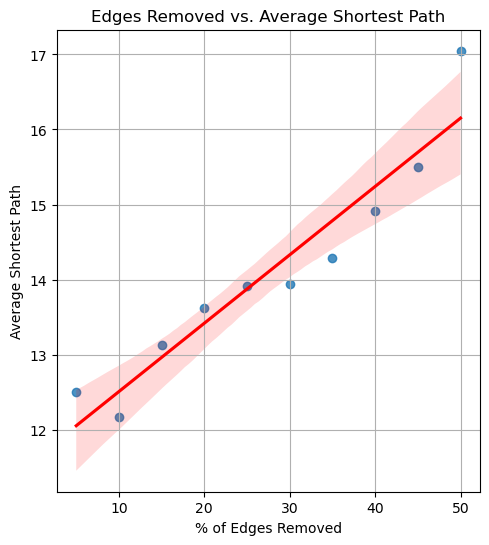

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(12, 6))

# Plot 1: % Edges Removed vs. Average Shortest Path
plt.subplot(1, 2, 1)
sns.regplot(x=percent_edges_removed, y=average_shortest_paths, marker='o', line_kws={"color": "red"})
plt.xlabel('% of Edges Removed')
plt.ylabel('Average Shortest Path')
plt.title('Edges Removed vs. Average Shortest Path')
plt.grid(True)

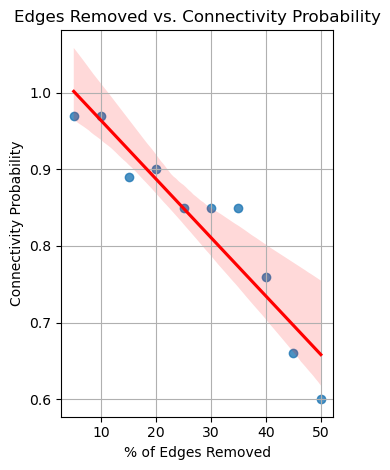

In [18]:
# Plot 2: % Edges Removed vs. Connectivity Probability
plt.subplot(1, 2, 2)
sns.regplot(x=percent_edges_removed, y=connectivity_probabilities, marker='o', line_kws={"color": "red"})
plt.xlabel('% of Edges Removed')
plt.ylabel('Connectivity Probability')
plt.title('Edges Removed vs. Connectivity Probability')
plt.grid(True)

plt.tight_layout()
plt.show()

   Percent Vertices Removed  Connectivity Probability  Average Shortest Path
0                         5                      0.95              12.105263
1                        10                      0.96              12.947917
2                        15                      0.94              12.531915
3                        20                      0.90              12.655556
4                        25                      0.88              14.352273
5                        30                      0.72              14.236111
6                        35                      0.65              14.800000
7                        40                      0.54              15.203704
8                        45                      0.53              16.641509
9                        50                      0.45              16.355556


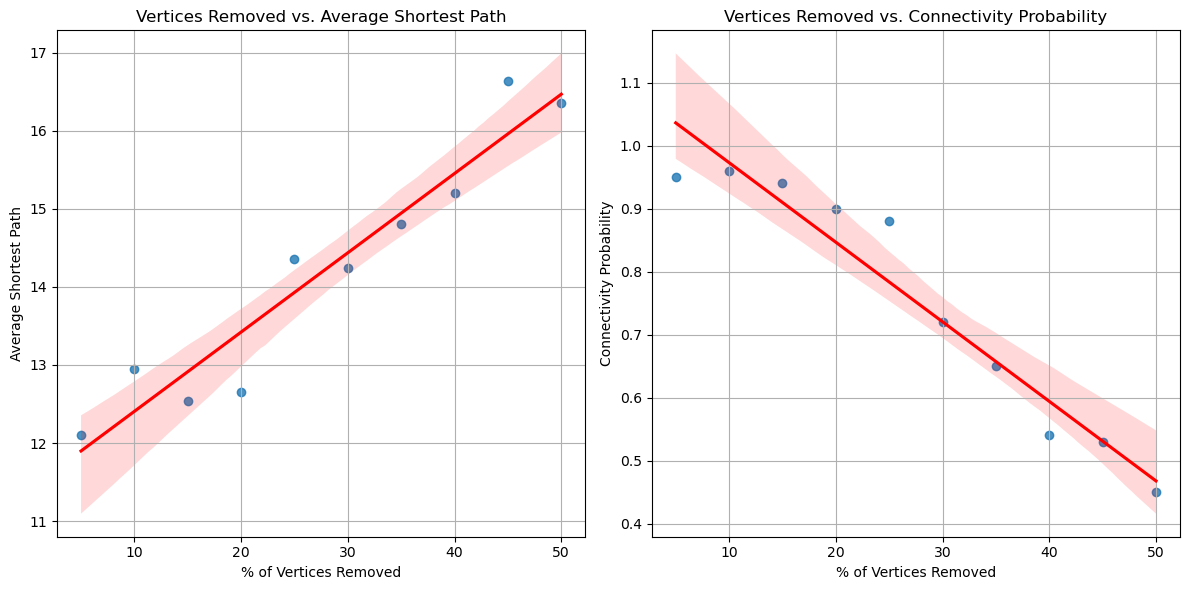

In [19]:
# Initialize lists to store results
percent_vertices_removed = []
connectivity_probabilities = []
average_shortest_paths = []

# Loop over the percentages of vertices to remove
for percent in range(5, 55, 5):  # 5%, 10%, ..., 50%
    G_temp = G.copy()
    
    # Calculate the number of vertices to remove
    nodes_to_remove = int(percent / 100 * G.number_of_nodes())
    
    # Randomly shuffle and remove the vertices
    nodes = list(G_temp.nodes())
    np.random.shuffle(nodes)
    G_temp.remove_nodes_from(nodes[:nodes_to_remove])
    
    # Estimate connectivity and average shortest path
    connectivity_probability, average_shortest_path = estimate_connectivity(G_temp)
    
    # Store the results
    percent_vertices_removed.append(percent)
    connectivity_probabilities.append(connectivity_probability)
    average_shortest_paths.append(average_shortest_path)

# Tabulate the results
results_df = pd.DataFrame({
    'Percent Vertices Removed': percent_vertices_removed,
    'Connectivity Probability': connectivity_probabilities,
    'Average Shortest Path': average_shortest_paths
})

# Display the table
print(results_df)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot 1: % Vertices Removed vs. Average Shortest Path
plt.subplot(1, 2, 1)
sns.regplot(x=percent_vertices_removed, y=average_shortest_paths, marker='o', line_kws={"color": "red"})
plt.xlabel('% of Vertices Removed')
plt.ylabel('Average Shortest Path')
plt.title('Vertices Removed vs. Average Shortest Path')
plt.grid(True)

# Plot 2: % Vertices Removed vs. Connectivity Probability
plt.subplot(1, 2, 2)
sns.regplot(x=percent_vertices_removed, y=connectivity_probabilities, marker='o', line_kws={"color": "red"})
plt.xlabel('% of Vertices Removed')
plt.ylabel('Connectivity Probability')
plt.title('Vertices Removed vs. Connectivity Probability')
plt.grid(True)

plt.tight_layout()
plt.show()

# Question: Is this a property of network systems under power law? 
Network remains robust with high connectivity and average path distance, as long as hubs are not knocked out.  

Key Characteristics of Power Law Graphs:
Heavy-Tailed Distribution:

A power law distribution has a "heavy tail," meaning that a few nodes have very high degrees (these are often called hubs), while most nodes have a low degree.
This is in contrast to distributions like the normal distribution, where most values are around the mean and extreme values are rare.
Scale-Free Networks:

Networks that follow a power law distribution are often called scale-free networks. This means that no matter the scale at which you observe the network (i.e., zooming in or out), the structure looks similar.
In scale-free networks, the distribution of connections is similar regardless of the size of the network.
Robustness and Vulnerability:

Power law networks tend to be robust against random failures because most nodes have few connections, and removing them has little effect on the overall structure.
However, they are vulnerable to targeted attacks on the highly connected nodes (hubs). If a hub is removed, the network can quickly become fragmented.
Real-World Examples:

Social Networks: In many social networks, a small number of people (influencers) have a large number of connections, while most people have only a few connections.
Internet: The structure of the internet, where a few highly connected websites receive most of the traffic, follows a power law.
Biological Networks: In cellular networks, some proteins interact with many others, playing a crucial role in the cell's function, while most proteins interact with only a few others.